In [8]:
import pandas as pd

df = pd.read_csv('../data/transactions.csv')
print(df.head())


         date    description   amount
0  2025-08-01      Starbucks    -5.50
1  2025-08-01         Salary  1500.00
2  2025-08-02           Uber    -8.75
3  2025-08-03  Grocery Store   -45.00
4  2025-08-04  Electric Bill   -60.00


In [9]:
# Load Data
import pandas as pd

df = pd.read_csv('../data/transactions.csv')
print(df.head())
print(df.info())
print(df.describe())


         date    description   amount
0  2025-08-01      Starbucks    -5.50
1  2025-08-01         Salary  1500.00
2  2025-08-02           Uber    -8.75
3  2025-08-03  Grocery Store   -45.00
4  2025-08-04  Electric Bill   -60.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5 non-null      object 
 1   description  5 non-null      object 
 2   amount       5 non-null      float64
dtypes: float64(1), object(2)
memory usage: 252.0+ bytes
None
            amount
count     5.000000
mean    276.150000
std     684.550528
min     -60.000000
25%     -45.000000
50%      -8.750000
75%      -5.500000
max    1500.000000


In [10]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['weekday'] = df['date'].dt.day_name()


In [11]:
def assign_category(desc):
    desc = desc.lower()
    if "starbucks" in desc:
        return "Food"
    elif "salary" in desc:
        return "Income"
    elif "uber" in desc:
        return "Transport"
    elif "grocery" in desc:
        return "Groceries"
    elif "bill" in desc:
        return "Utilities"
    else:
        return "Other"

df['category'] = df['description'].apply(assign_category)
df[['description', 'category']]


,description,category
0,Starbucks,Food
1,Salary,Income
2,Uber,Transport
3,Grocery Store,Groceries
4,Electric Bill,Utilities


Matplotlib is building the font cache; this may take a moment.


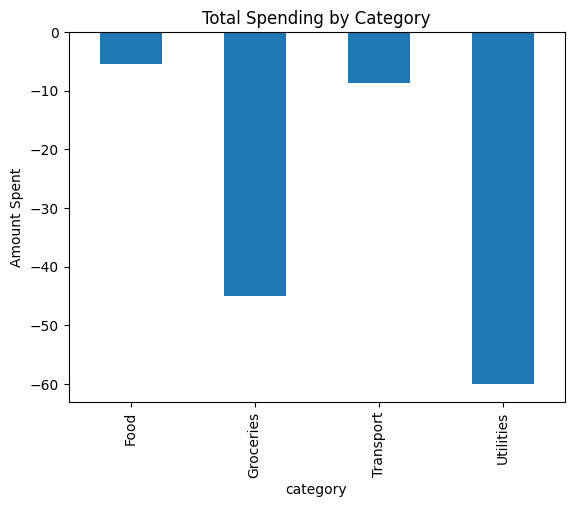

In [12]:
import matplotlib.pyplot as plt

df[df['amount'] < 0].groupby('category')['amount'].sum().plot(kind='bar')
plt.title("Total Spending by Category")
plt.ylabel("Amount Spent")
plt.show()
